## Thư viện

In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('churn.txt', delimiter = ",")

In [4]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


## Ý nghĩa của các cột

State: categorical, for the 50 states and the District of Columbia

Account length: integer-valued, how long account has been active

Area code: categorical

Phone number: essentially a surrogate for customer ID

International Plan: dichotomous categorical, yes or no

VoiceMail Plan: dichotomous categorical, yes or no

Number of voice mail messages: integer-valued

Total day minutes: continuous, minutes customer used service during the day

Total day calls: integer-valued

Total day charge: continuous, perhaps based on foregoing two variables

Total evening minutes: continuous, minutes customer used service during the evening

Total evening calls: integer-valued

Total evening charge: continuous, perhaps based on foregoing two variables

Total night minutes: continuous, minutes customer used service during the night

Total night calls: integer-valued

Total night charge: continuous, perhaps based on foregoing two variables

Total international minutes: continuous, minutes customer used service to makeinternational calls

Total international calls: integer-valued

Total international charge: continuous, perhaps based on foregoing two variables

Number of calls to customer service: integer-valued

## Tiền xử lý

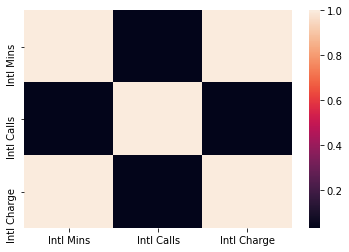

In [6]:
data = df[['Intl Mins','Intl Calls','Intl Charge']]
corr = data.corr()
# plotting the heatmap
hm = sns.heatmap(corr)
  
# displaying the plotted heatmap
plt.show()

In [7]:
df = df.drop(['Day Charge','Eve Charge','Night Charge','Intl Charge'], axis = 1)

## Phân lớp các cột dữ liệu

In [8]:
df['Area Code'].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

(array([ 99., 227., 499., 734., 767., 575., 286., 111.,  28.,   7.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <BarContainer object of 10 artists>)

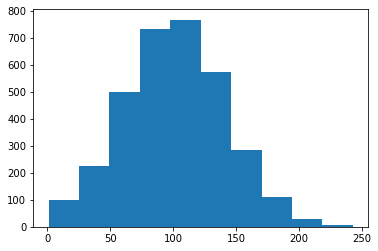

In [9]:
plt.hist(df['Account Length'])
#<50,50-150,>150

(array([2412.,    5.,   28.,   75.,  175.,  233.,  208.,  134.,   50.,
          13.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

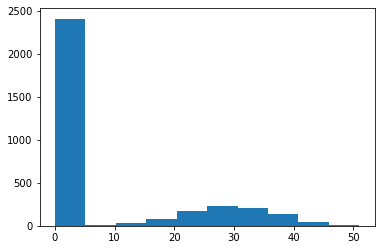

In [10]:
plt.hist(df['VMail Message'])
# =0, !=0

(array([ 14.,  67., 201., 479., 798., 812., 594., 264.,  84.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <BarContainer object of 10 artists>)

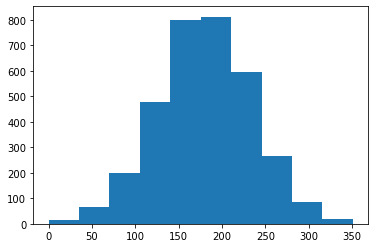

In [11]:
plt.hist(df['Day Mins'])
# <150,150-250,>250

(array([2.000e+00, 1.000e+00, 1.900e+01, 1.160e+02, 4.690e+02, 9.170e+02,
        1.055e+03, 5.540e+02, 1.790e+02, 2.100e+01]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

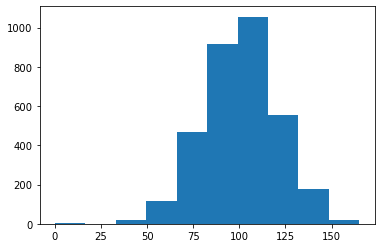

In [12]:
plt.hist(df['Day Calls'])
# <75, 75-125,>125

(array([  2.,  21.,  87., 339., 742., 932., 716., 375.,  98.,  21.]),
 array([  0.  ,  36.37,  72.74, 109.11, 145.48, 181.85, 218.22, 254.59,
        290.96, 327.33, 363.7 ]),
 <BarContainer object of 10 artists>)

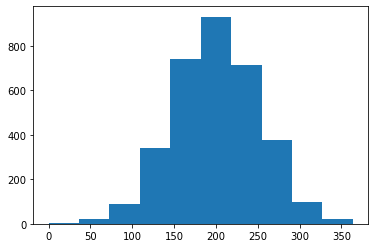

In [13]:
plt.hist(df['Eve Mins'])
# <150,150-250,>250

(array([   2.,    0.,   20.,  159.,  526., 1034., 1025.,  434.,  121.,
          12.]),
 array([  0.,  17.,  34.,  51.,  68.,  85., 102., 119., 136., 153., 170.]),
 <BarContainer object of 10 artists>)

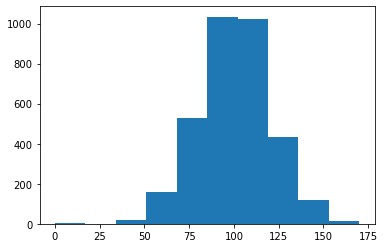

In [14]:
plt.hist(df['Eve Calls'])
# <75,75-125,>125

(array([ 11.,  56., 246., 646., 910., 848., 452., 132.,  26.,   6.]),
 array([ 23.2 ,  60.38,  97.56, 134.74, 171.92, 209.1 , 246.28, 283.46,
        320.64, 357.82, 395.  ]),
 <BarContainer object of 10 artists>)

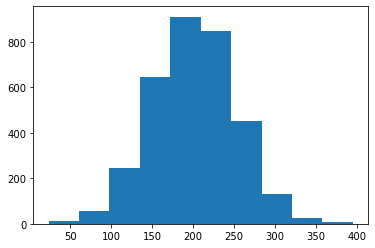

In [15]:
plt.hist(df['Night Mins'])
#>150,150-250,>250

(array([  7.,  71., 279., 624., 888., 875., 434., 121.,  31.,   3.]),
 array([ 33. ,  47.2,  61.4,  75.6,  89.8, 104. , 118.2, 132.4, 146.6,
        160.8, 175. ]),
 <BarContainer object of 10 artists>)

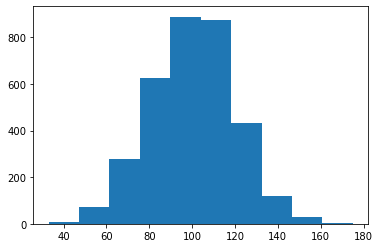

In [16]:
plt.hist(df['Night Calls'])
#<80,80-120,>120

(array([ 20.,  32., 158., 449., 820., 968., 606., 219.,  52.,   9.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

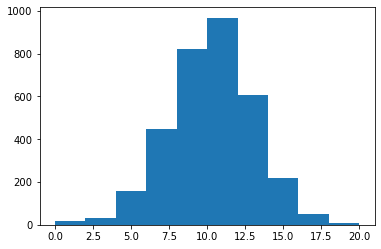

In [17]:
plt.hist(df['Intl Mins'])
#<7.5,7.5-12.5,>12.5

(array([ 178., 1157., 1091.,  554.,  225.,   78.,   29.,   13.,    3.,
           5.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

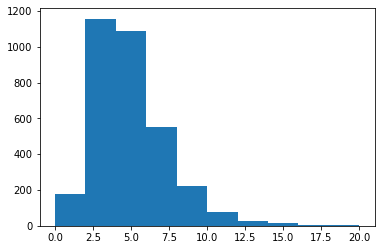

In [18]:
plt.hist(df['Intl Calls'])
#<2.5,2.5-7.5,>7.5

(array([ 697., 1181.,  759.,  429.,  166.,   66.,   22.,    9.,    2.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

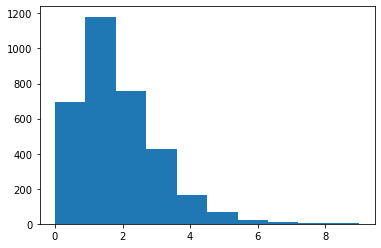

In [19]:
plt.hist(df['CustServ Calls'])
#<=2,>2

## Chuyển giá trị trong cột dữ liệu về dạng True/Fasle

In [20]:
def convert(df):
    df =df[['Phone','Area Code','Account Length',"Int'l Plan",'VMail Plan','VMail Message','Day Mins', 'Day Calls', 'Eve Mins',
       'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins', 'Intl Calls','CustServ Calls']]
    
    df = pd.get_dummies(df, columns=["Area Code"], dtype=bool)
    
    df['Account Length'] = np.where(df['Account Length'] < 50, 'Low', np.where(df['Account Length'] > 150, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Account Length"], dtype=bool)
    
    df["Int'l Plan"] = np.where(df["Int'l Plan"]=='yes',True,False)
    
    df["VMail Plan"] = np.where(df["VMail Plan"]=='yes',True,False)
    
    df["VMail Message"] = np.where(df["VMail Message"]==0,False,True)
    
    df['Day Mins'] = np.where(df['Day Mins'] < 150, 'Low', np.where(df['Day Mins'] > 250, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Day Mins"], dtype=bool)
    
    df['Day Calls'] = np.where(df['Day Calls'] < 75, 'Low', np.where(df['Day Calls'] > 125, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Day Calls"], dtype=bool)
    
    df['Eve Mins'] = np.where(df['Eve Mins'] < 150, 'Low', np.where(df['Eve Mins'] > 250, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Eve Mins"], dtype=bool)
    
    df['Eve Calls'] = np.where(df['Eve Calls'] < 75, 'Low', np.where(df['Eve Calls'] > 125, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Eve Calls"], dtype=bool)
    
    df['Night Mins'] = np.where(df['Night Mins'] < 150, 'Low', np.where(df['Night Mins'] > 250, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Night Mins"], dtype=bool)
    
    df['Night Calls'] = np.where(df['Night Calls'] < 80, 'Low', np.where(df['Night Calls'] > 120, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Night Calls"], dtype=bool)
    
    df['Intl Mins'] = np.where(df['Intl Mins'] < 7.5, 'Low', np.where(df['Intl Mins'] > 12.5, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Intl Mins"], dtype=bool)
    
    df['Intl Calls'] = np.where(df['Intl Calls'] < 2.5, 'Low', np.where(df['Intl Calls'] > 7.5, 'High', 'Medium'))
    df = pd.get_dummies(df, columns=["Intl Calls"], dtype=bool)
    
    df["CustServ Calls"] = np.where(df["CustServ Calls"]<= 2,True,False)
    
    df = df.set_index('Phone')
    return df

## Đặt câu hỏi

In [21]:
df_churn = df[df['Churn?']=='True.']
df_no_churn = df[df['Churn?']=='False.']

### Câu 1: Nguyên nhân nào khiến cho khách hàng từ bỏ sử dụng dịch vụ của công ty để chuyển sang công ty khác?

In [22]:
df_churn_new = convert(df_churn)
df_churn_new

,Int'l Plan,VMail Plan,VMail Message,CustServ Calls,Area Code_408,Area Code_415,Area Code_510,Account Length_High,Account Length_Low,Account Length_Medium,...,Night Mins_Medium,Night Calls_High,Night Calls_Low,Night Calls_Medium,Intl Mins_High,Intl Mins_Low,Intl Mins_Medium,Intl Calls_High,Intl Calls_Low,Intl Calls_Medium
Phone,,,,,,,,,,,,,,,,,,,,,
329-6603,False,False,False,False,False,True,False,False,False,True,...,True,False,False,True,True,False,False,False,False,True
351-7269,False,False,False,False,False,True,False,True,False,False,...,True,True,False,False,False,True,False,True,False,False
393-7984,False,False,False,False,True,False,False,False,False,True,...,True,False,True,False,False,True,False,False,False,True
360-1596,False,False,False,True,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
383-6029,True,True,True,True,True,False,False,False,False,True,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417-1488,False,False,False,True,False,True,False,False,False,True,...,True,False,False,True,False,False,True,False,False,True
330-7137,True,False,False,False,False,False,True,False,False,True,...,True,False,False,True,True,False,False,False,False,True
411-5677,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,True


In [23]:
frequent_itemsets_churn = fpgrowth(df_churn_new, min_support=0.6,use_colnames=True)
frequent_itemsets_churn

,support,itemsets
0,0.801242,(Account Length_Medium)
1,0.788820,(Eve Calls_Medium)
2,0.691511,(Night Mins_Medium)
3,0.674948,(Night Calls_Medium)
4,0.645963,(Eve Mins_Medium)
5,0.621118,(Intl Calls_Medium)
6,0.778468,(Day Calls_Medium)
7,0.623188,(CustServ Calls)
8,0.614907,(Intl Mins_Medium)
9,0.631470,"(Eve Calls_Medium, Account Length_Medium)"


### Câu 2: Những khách hàng đang sử dụng dịch vụ của công ty có những đặc điểm nào?

In [24]:
df_no_churn_new = convert(df_no_churn)

In [25]:
frequent_itemsets_no_churn = fpgrowth(df_no_churn_new, min_support=0.6,use_colnames=True)
frequent_itemsets_no_churn

,support,itemsets
0,0.819649,(CustServ Calls)
1,0.805965,(Eve Calls_Medium)
2,0.801754,(Day Calls_Medium)
3,0.794386,(Account Length_Medium)
4,0.706316,(Intl Calls_Medium)
5,0.703158,(Night Calls_Medium)
6,0.684912,(Eve Mins_Medium)
7,0.675439,(Night Mins_Medium)
8,0.657895,(Intl Mins_Medium)
9,0.638246,(Day Mins_Medium)


### Câu 3: Khách hàng sử dụng dịch vụ của công ty như thế nào?

In [26]:
df_new = convert(df)
df_new["Churn?"] = np.where(df["Churn?"]=='True.',True,False)
df_new

,Int'l Plan,VMail Plan,VMail Message,CustServ Calls,Area Code_408,Area Code_415,Area Code_510,Account Length_High,Account Length_Low,Account Length_Medium,...,Night Calls_High,Night Calls_Low,Night Calls_Medium,Intl Mins_High,Intl Mins_Low,Intl Mins_Medium,Intl Calls_High,Intl Calls_Low,Intl Calls_Medium,Churn?
Phone,,,,,,,,,,,,,,,,,,,,,
382-4657,False,True,True,True,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
371-7191,False,True,True,True,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
358-1921,False,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
375-9999,True,False,False,True,True,False,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
330-6626,True,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414-4276,False,True,True,True,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
370-3271,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
328-8230,False,False,False,True,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False


In [27]:
frequent_itemsets = fpgrowth(df_new, min_support=0.6,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.803480,(Eve Calls_Medium)
1,0.798380,(Day Calls_Medium)
2,0.795380,(Account Length_Medium)
3,0.791179,(CustServ Calls)
4,0.699070,(Night Calls_Medium)
5,0.693969,(Intl Calls_Medium)
6,0.679268,(Eve Mins_Medium)
7,0.677768,(Night Mins_Medium)
8,0.651665,(Intl Mins_Medium)
9,0.609661,(Day Mins_Medium)


In [28]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Day Calls_Medium),(Eve Calls_Medium),0.798380,0.803480,0.644464,0.807215,1.004649,0.002982,1.019374
1,(Eve Calls_Medium),(Day Calls_Medium),0.803480,0.798380,0.644464,0.802091,1.004649,0.002982,1.018752
2,(Day Calls_Medium),(Account Length_Medium),0.798380,0.795380,0.641764,0.803833,1.010628,0.006749,1.043094
3,(Account Length_Medium),(Day Calls_Medium),0.795380,0.798380,0.641764,0.806865,1.010628,0.006749,1.043936
4,(Eve Calls_Medium),(Account Length_Medium),0.803480,0.795380,0.639664,0.796117,1.000927,0.000592,1.003615
5,(Account Length_Medium),(Eve Calls_Medium),0.795380,0.803480,0.639664,0.804225,1.000927,0.000592,1.003803
6,(CustServ Calls),(Eve Calls_Medium),0.791179,0.803480,0.640264,0.809253,1.007184,0.004567,1.030263
7,(Eve Calls_Medium),(CustServ Calls),0.803480,0.791179,0.640264,0.796863,1.007184,0.004567,1.027982
8,(CustServ Calls),(Day Calls_Medium),0.791179,0.798380,0.626763,0.792188,0.992245,-0.004899,0.970205
9,(Day Calls_Medium),(CustServ Calls),0.798380,0.791179,0.626763,0.785043,0.992245,-0.004899,0.971455
